In [1]:
nama = input("masukkan nama akun twitter: ")
#umur = input("Berapa umur kamu: ")

# Menampilkan output
print ("kamu akan menganalisa akun atas nama",nama,"jangan disalahkan yaaaaa")


masukkan nama akun twitter:  @jokowi


kamu akan menganalisa akun atas nama @jokowi jangan disalahkan yaaaaa


In [28]:
#Declare the libraries needed
import tweepy 
import pandas as pd
import sys
import csv
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
from PIL import Image
import pandas_profiling
import twitter
#api = twitter.Api(consumer_key='consumer_key',consumer_secret='consumer_secret',
#access_token_key='access_token',access_token_secret='access_token_secret')
api = twitter.Api(consumer_key='YLSBZeZ5ytLD8u1ZLgmWs7jeU',
                      consumer_secret='zVO69K86YtEkODZOiAe53p0F1Qkogh4BrPAIEw8vfjRuk4ptdO',
                      access_token_key='1117266834653241346-3VBwsLFoSsHu4Rm7bVlERRmDun4UED',
                      access_token_secret='8QboAOWWEVWYgyP8Dh16CoDjakXpp1FkcU4AKY1MbuGgP')
  
# Function to extract tweets 
def get_tweets(username): 
          
        # Authorization to consumer key and consumer secret 
        auth = tweepy.OAuthHandler('YLSBZeZ5ytLD8u1ZLgmWs7jeU', 'zVO69K86YtEkODZOiAe53p0F1Qkogh4BrPAIEw8vfjRuk4ptdO') 
  
        # Access to user's access key and access secret 
        auth.set_access_token('1117266834653241346-3VBwsLFoSsHu4Rm7bVlERRmDun4UED', '8QboAOWWEVWYgyP8Dh16CoDjakXpp1FkcU4AKY1MbuGgP') 
  
        # Calling api 
        api = tweepy.API(auth) 
        #set count to however many tweets you want - max count is 3200 and this doesn't have any effect if it is more than 3200
#        number_of_tweets = 5000
       
        tfile = []
        for tweet in tweepy.Cursor(api.user_timeline, screen_name = username).items():
            tfile.append([len(tweet.text), username, tweet.id_str,tweet.source, tweet.created_at,tweet.retweet_count,tweet.favorite_count, tweet.text.encode("utf-8")])

	#write to a new csv file from the array of tweets
        outfile = username + "_tweets_V14.csv"
        print ("writing to " + outfile)
        with open(outfile, 'w+') as file:
            writer = csv.writer(file, delimiter=',')
            writer.writerow(['len','User_Name', 'Tweet_ID', 'Source', 'Created_date','Retweet_count','Favorite_count','Text',])
            writer.writerows(tfile)
# user name
get_tweets(nama)  

KeyboardInterrupt: 

In [29]:
#Read the file and also assign it to dataframe
import tweepy 
import pandas as pd
import sys
import csv
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
from PIL import Image
import pandas_profiling
import twitter
import numpy as np
import nltk
import warnings 

import string

#bg= pd.read_csv(nama + "_tweets_V14.csv",encoding='utf-8') 
bg= pd.read_csv("@netmediatama_tweets_V14.csv",encoding='utf-8') 
bg.head()


,len,User_Name,Tweet_ID,Source,Created_date,Retweet_count,Favorite_count,Text
0,34,@netmediatama,1163466902406074368,Twitter Media Studio,2019-08-19 15:05:00,24,100,b'Hai Enzy~~ https://t.co/pGL9QQ68jA'
1,140,@netmediatama,1163465644169449472,Twitter Media Studio,2019-08-19 15:00:00,3,21,"b'Yuhuuu! Mulai hari ini, MALAM MALAM kamu dij..."
2,52,@netmediatama,1163464385282449409,Twitter Media Studio,2019-08-19 14:55:00,4,30,b'Waduuuh! Mainnya keroyokan\xf0\x9f\x98\x82\x...
3,61,@netmediatama,1163459352369356801,Twitter Media Studio,2019-08-19 14:35:00,55,217,b'Pantesan cepet! Ternyata bolong~~~ \xf0\x9f\...
4,80,@netmediatama,1163445511157764096,Twitter Media Studio,2019-08-19 13:40:00,10,44,b'Dari kenalan jadi gombal deh! Bang Andre ema...


In [30]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [31]:
# remove twitter handles (@user)
bg['tidy_tweet'] = np.vectorize(remove_pattern)(bg['Text'], "@[\w]*")
bg['tidy_tweet'] = bg['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
bg['tidy_tweet'] = bg['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
bg.head()


,len,User_Name,Tweet_ID,Source,Created_date,Retweet_count,Favorite_count,Text,tidy_tweet
0,34,@netmediatama,1163466902406074368,Twitter Media Studio,2019-08-19 15:05:00,24,100,b'Hai Enzy~~ https://t.co/pGL9QQ68jA',Enzy https
1,140,@netmediatama,1163465644169449472,Twitter Media Studio,2019-08-19 15:00:00,3,21,"b'Yuhuuu! Mulai hari ini, MALAM MALAM kamu dij...",Yuhuuu Mulai hari MALAM MALAM kamu dijamin mak...
2,52,@netmediatama,1163464385282449409,Twitter Media Studio,2019-08-19 14:55:00,4,30,b'Waduuuh! Mainnya keroyokan\xf0\x9f\x98\x82\x...,Waduuuh Mainnya keroyokan https GCLBzAmjOY
3,61,@netmediatama,1163459352369356801,Twitter Media Studio,2019-08-19 14:35:00,55,217,b'Pantesan cepet! Ternyata bolong~~~ \xf0\x9f\...,Pantesan cepet Ternyata bolong https CrmXbv
4,80,@netmediatama,1163445511157764096,Twitter Media Studio,2019-08-19 13:40:00,10,44,b'Dari kenalan jadi gombal deh! Bang Andre ema...,Dari kenalan jadi gombal Bang Andre emang raja...


In [32]:
tokenized_tweet = bg['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                        [Enzy, https]
1    [Yuhuuu, Mulai, hari, MALAM, MALAM, kamu, dija...
2     [Waduuuh, Mainnya, keroyokan, https, GCLBzAmjOY]
3    [Pantesan, cepet, Ternyata, bolong, https, Crm...
4    [Dari, kenalan, jadi, gombal, Bang, Andre, ema...
Name: tidy_tweet, dtype: object

In [33]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                                         [enzi, http]
1    [yuhuuu, mulai, hari, malam, malam, kamu, dija...
2      [waduuuh, mainnya, keroyokan, http, gclbzamjoy]
3    [pantesan, cepet, ternyata, bolong, http, crmxbv]
4    [dari, kenalan, jadi, gombal, bang, andr, eman...
Name: tidy_tweet, dtype: object

In [34]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

bg['tidy_tweet'] = tokenized_tweet
tknz = tokenized_tweet

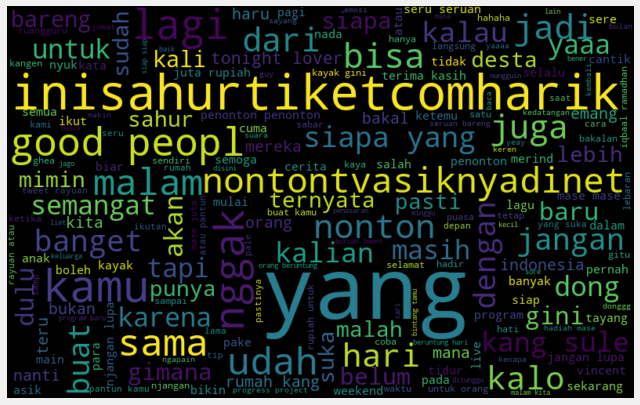

In [35]:
all_words = ' '.join([text for text in bg['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [36]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [37]:
from textblob import TextBlob
import re
def analize_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
bg['SA'] = np.array([analize_sentiment(tweet) for tweet in bg['tidy_tweet']])

# We display the updated dataframe with the new column:
display(bg.head(10))

,len,User_Name,Tweet_ID,Source,Created_date,Retweet_count,Favorite_count,Text,tidy_tweet,SA
0,34,@netmediatama,1163466902406074368,Twitter Media Studio,2019-08-19 15:05:00,24,100,b'Hai Enzy~~ https://t.co/pGL9QQ68jA',enzi http,0
1,140,@netmediatama,1163465644169449472,Twitter Media Studio,2019-08-19 15:00:00,3,21,"b'Yuhuuu! Mulai hari ini, MALAM MALAM kamu dij...",yuhuuu mulai hari malam malam kamu dijamin mak...,0
2,52,@netmediatama,1163464385282449409,Twitter Media Studio,2019-08-19 14:55:00,4,30,b'Waduuuh! Mainnya keroyokan\xf0\x9f\x98\x82\x...,waduuuh mainnya keroyokan http gclbzamjoy,0
3,61,@netmediatama,1163459352369356801,Twitter Media Studio,2019-08-19 14:35:00,55,217,b'Pantesan cepet! Ternyata bolong~~~ \xf0\x9f\...,pantesan cepet ternyata bolong http crmxbv,0
4,80,@netmediatama,1163445511157764096,Twitter Media Studio,2019-08-19 13:40:00,10,44,b'Dari kenalan jadi gombal deh! Bang Andre ema...,dari kenalan jadi gombal bang andr emang rajan...,0
5,58,@netmediatama,1163439219647401985,Twitter Media Studio,2019-08-19 13:15:00,12,52,"b'""Euuisss! Jangan pergi lagi euis!"" https://t...",euuisss jangan pergi lagi eui http xiddpaugt,0
6,68,@netmediatama,1163437961444241408,Twitter Media Studio,2019-08-19 13:10:00,4,45,"b'Jago sih hip hop, tapii kok terakhirnya..\xf...",jago tapii terakhirnya http ivma ngqc,0
7,55,@netmediatama,1163436703182442498,Twitter Media Studio,2019-08-19 13:05:00,5,24,b'Haduuuh! Mentang-mentang niiih! https://t.co...,haduuuh mentang mentang niiih http pmgqj krkl,0
8,53,@netmediatama,1163422861928873986,Twitter Media Studio,2019-08-19 12:10:00,7,34,b'Ketika Jamu dan Daki bertemu\xf0\x9f\x98\x82...,ketika jamu daki bertemu http durp,0
9,94,@netmediatama,1163418835338313728,TweetDeck,2019-08-19 11:54:00,2,43,"b'Tidak tayang, adanya Kesempurnaan Cinta &amp...",tidak tayang adanya kesempurnaan cinta saya te...,0


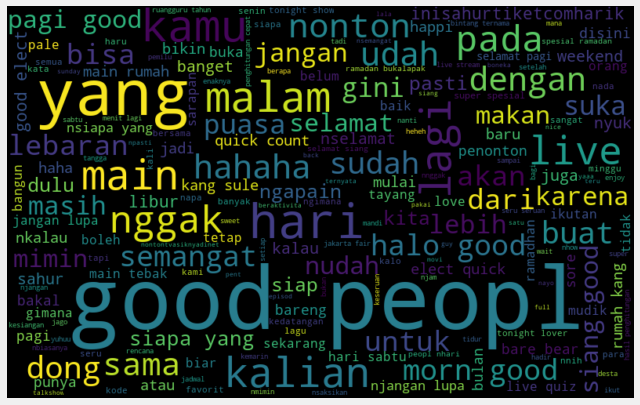

In [38]:
normal_words =' '.join([text for text in bg['tidy_tweet'][bg['SA'] > 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear")
wordcloud.to_file("image/normal_word.jpg");
plt.show()

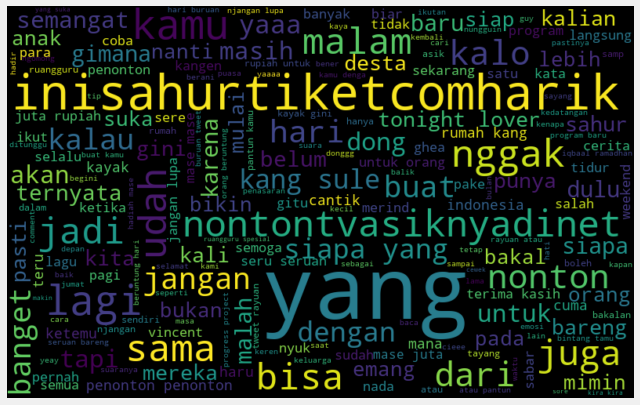

In [39]:
netral_words =' '.join([text for text in bg['tidy_tweet'][bg['SA'] == 0]])
#print(normal_words)
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(netral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
wordcloud.to_file("image/netral_word.jpg");
plt.show()

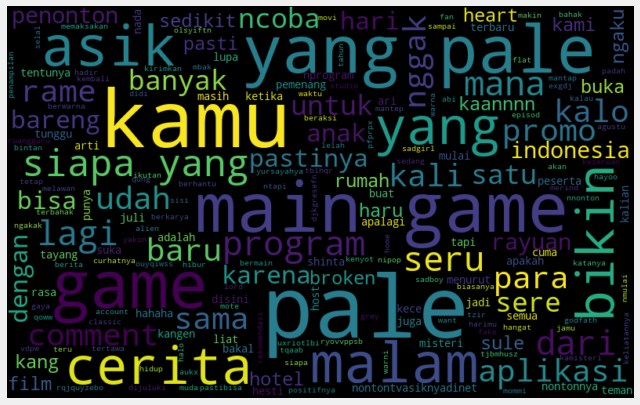

In [40]:
negative_words = ' '.join([text for text in bg['tidy_tweet'][bg['SA'] < 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
wordcloud.to_file("image/negative_word.jpg");
plt.show()

In [41]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(bg['tidy_tweet'][bg['Retweet_count'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(bg['tidy_tweet'][bg['Retweet_count'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

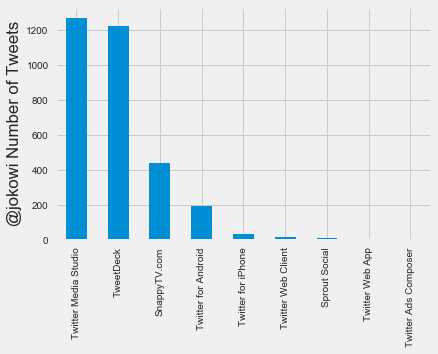

In [42]:
bg['Source'].value_counts().plot(kind="bar")
plt.ylabel(nama + " Number of Tweets")
plt.savefig('image/bar.png')

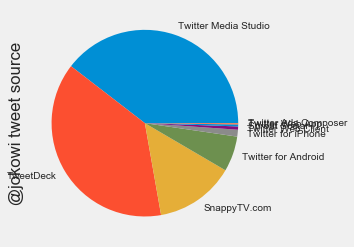

In [43]:
bg['Source'].value_counts().plot(kind="pie")
plt.ylabel(nama + " tweet source")
plt.savefig('image/pie.png')

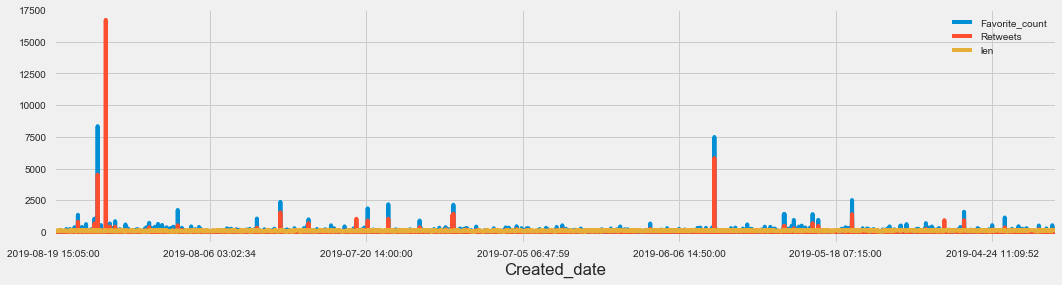

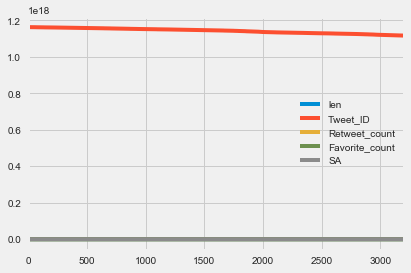

In [44]:
plt = pd.Series(data=bg['Retweet_count'].values, index=bg['Created_date'])
pltd = pd.Series(data=bg['Favorite_count'].values, index=bg['Created_date'])
tret = pd.Series(data=bg['len'].values, index=bg['Created_date'])
#tret.plot(figsize=(16,4), color='r');

pltd.plot(figsize=(16,4), label="Favorite_count", legend=True)
plt.plot(figsize=(16,4), label="Retweets", legend=True);
tret.plot(figsize=(16,4), label="len", legend=True);
ax = bg.plot()
fig = ax.get_figure()
fig.savefig('asdf.png')

In [45]:
from textblob import TextBlob
import re
def analize_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
bg['SA'] = np.array([analize_sentiment(tweet) for tweet in bg['tidy_tweet']])

# We display the updated dataframe with the new column:
display(bg.head(10))

,len,User_Name,Tweet_ID,Source,Created_date,Retweet_count,Favorite_count,Text,tidy_tweet,SA
0,34,@netmediatama,1163466902406074368,Twitter Media Studio,2019-08-19 15:05:00,24,100,b'Hai Enzy~~ https://t.co/pGL9QQ68jA',enzi http,0
1,140,@netmediatama,1163465644169449472,Twitter Media Studio,2019-08-19 15:00:00,3,21,"b'Yuhuuu! Mulai hari ini, MALAM MALAM kamu dij...",yuhuuu mulai hari malam malam kamu dijamin mak...,0
2,52,@netmediatama,1163464385282449409,Twitter Media Studio,2019-08-19 14:55:00,4,30,b'Waduuuh! Mainnya keroyokan\xf0\x9f\x98\x82\x...,waduuuh mainnya keroyokan http gclbzamjoy,0
3,61,@netmediatama,1163459352369356801,Twitter Media Studio,2019-08-19 14:35:00,55,217,b'Pantesan cepet! Ternyata bolong~~~ \xf0\x9f\...,pantesan cepet ternyata bolong http crmxbv,0
4,80,@netmediatama,1163445511157764096,Twitter Media Studio,2019-08-19 13:40:00,10,44,b'Dari kenalan jadi gombal deh! Bang Andre ema...,dari kenalan jadi gombal bang andr emang rajan...,0
5,58,@netmediatama,1163439219647401985,Twitter Media Studio,2019-08-19 13:15:00,12,52,"b'""Euuisss! Jangan pergi lagi euis!"" https://t...",euuisss jangan pergi lagi eui http xiddpaugt,0
6,68,@netmediatama,1163437961444241408,Twitter Media Studio,2019-08-19 13:10:00,4,45,"b'Jago sih hip hop, tapii kok terakhirnya..\xf...",jago tapii terakhirnya http ivma ngqc,0
7,55,@netmediatama,1163436703182442498,Twitter Media Studio,2019-08-19 13:05:00,5,24,b'Haduuuh! Mentang-mentang niiih! https://t.co...,haduuuh mentang mentang niiih http pmgqj krkl,0
8,53,@netmediatama,1163422861928873986,Twitter Media Studio,2019-08-19 12:10:00,7,34,b'Ketika Jamu dan Daki bertemu\xf0\x9f\x98\x82...,ketika jamu daki bertemu http durp,0
9,94,@netmediatama,1163418835338313728,TweetDeck,2019-08-19 11:54:00,2,43,"b'Tidak tayang, adanya Kesempurnaan Cinta &amp...",tidak tayang adanya kesempurnaan cinta saya te...,0


In [46]:
pos_tweets = [ tweet for index, tweet in enumerate(bg['tidy_tweet']) if bg['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(bg['tidy_tweet']) if bg['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(bg['tidy_tweet']) if bg['SA'][index] < 0]

In [47]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(bg['tidy_tweet'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(bg['tidy_tweet'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(bg['tidy_tweet'])))
pda = format(len(pos_tweets)*100/len(bg['tidy_tweet']))
pdb = format(len(neu_tweets)*100/len(bg['tidy_tweet']))
pdc = format(len(neg_tweets)*100/len(bg['tidy_tweet']))


Percentage of positive tweets: 10.58052434456929%
Percentage of neutral tweets: 87.67166042446941%
Percentage de negative tweets: 1.7478152309612984%


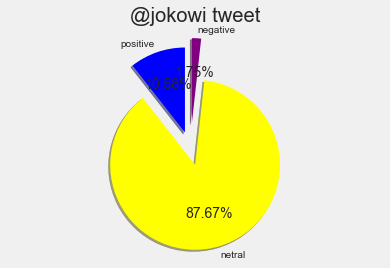

In [48]:
import matplotlib.pyplot as plt
labels= ['positive', 'netral', 'negative']

colors=['blue', 'yellow', 'purple', 'orange']

sizes= [pda, pdb, pdc]

paklek = plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.2, 0.2, 0.3), autopct='%1.2f%%')

plt.title(nama + " tweet")

plt.axis('equal')
plt.savefig('image/piepn.png')
plt.show()

[-39.381185880237396, -23.77621769298376, -11.297224987631399, -8.00073131975024, -5.666366235740391, -4.7002812555294415]


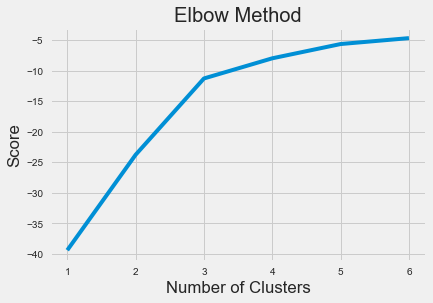

In [49]:
#import numpy as np # linear algebra

from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.style.use('fivethirtyeight')


# email module has some useful functions
import os, sys, email,re


# In[11]:


from sklearn.feature_extraction.text import TfidfVectorizer
data = bg['tidy_tweet'] #df['body_new']


tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()


# In[12]:


import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()


# In[13]:


class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids


# In[14]:


def assign_clusters(self, data):
    """Compute distance of data from clusters and assign data point
       to closest cluster.
    
    Parameters
    ----------
    data: array or matrix, number_rows, number_features
    
    Returns
    --------
    cluster_labels: index which minmises the distance of data to each
    cluster
        
    """
    
    if data.ndim == 1:
        data = bg['tidy_tweet']
    
    dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
    self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
    
    return  self.cluster_labels


def update_centroids(self, data):
    """Computes average of all data points in cluster and
       assigns new centroids as average of data points
    
    Parameters
    -----------
    data: array or matrix, number_rows, number_features
    
    Returns
    -----------
    centroids: array, k, number_features
    """
    
    self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
    
    return self.centroids


# In[15]:


def predict(self, data):
    """"" "Memprediksi titik data kluster mana yang dimiliki
    
     Parameter
     ----------
     data: array atau matriks, number_rows, number_features
    
     Kembali
     --------
     cluster_labels: indeks yang memperkecil jarak data ke masing-masing
     gugus
     "" "
    """
    
    return self.assign_clusters(data)

def fit_kmeans(self, data):
    """
    Fungsi ini berisi loop utama agar sesuai dengan algoritma
     Menerapkan inisialisasi centroid dan update_centroid
     menurut max_iter
     -----------------------
    
     Kembali
     -------
     turunan dari kelas kmeans
        
    """
    self.centroids = self.initialise_centroids(data)
    
    # Main kmeans loop
    for iter in range(self.max_iter):

        self.cluster_labels = self.assign_clusters(data)
        self.centroids = self.update_centroids(data)          
        if iter % 100 == 0:
            print("Running Model Iteration %d " %iter)
    print("Model finished running")
    return self    


# In[16]:


sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
print(score)

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.savefig('image/kmeanst.png', dpi=100)
plt.show()

#fig1.savefig('tessstttyyy.png', dpi=100)


In [50]:
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    
    
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = bg['SA']
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    
    
    
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self   

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


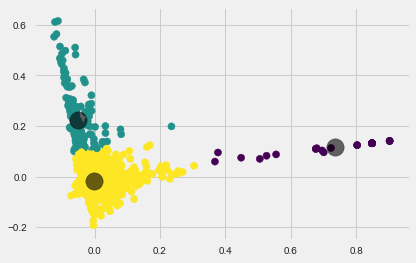

In [51]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
test_e = Kmeans(3, 1, 600)
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);
plt.savefig('image/persebaran.png', dpi=100)
plt.show()